#pdf2image

In [4]:
!pip install pdf2image


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [5]:
from pdf2image import convert_from_path, convert_from_bytes
from IPython.display import display, Image

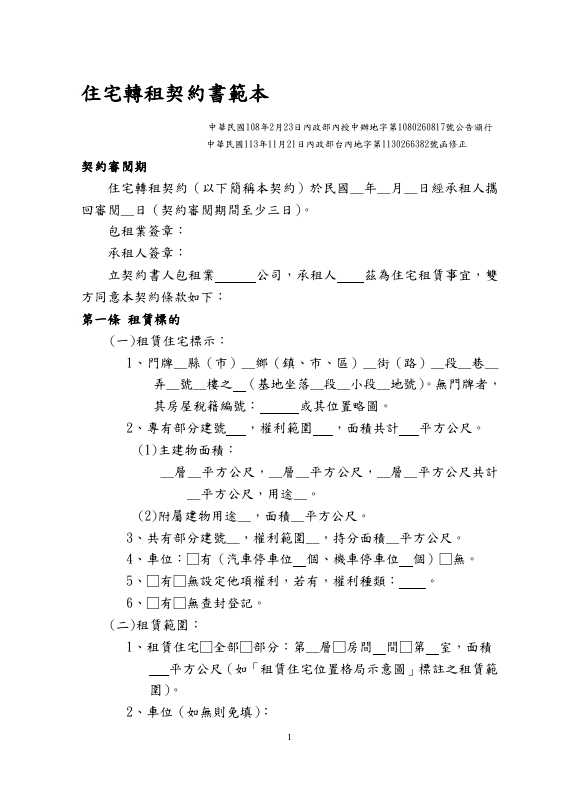

In [7]:
images = convert_from_bytes(open('/Users/kdanmobile/gitlab/Side_Project/contract/training/pdf/住宅轉租契約書範本.pdf', 'rb').read(), size=800)
display(images[0])

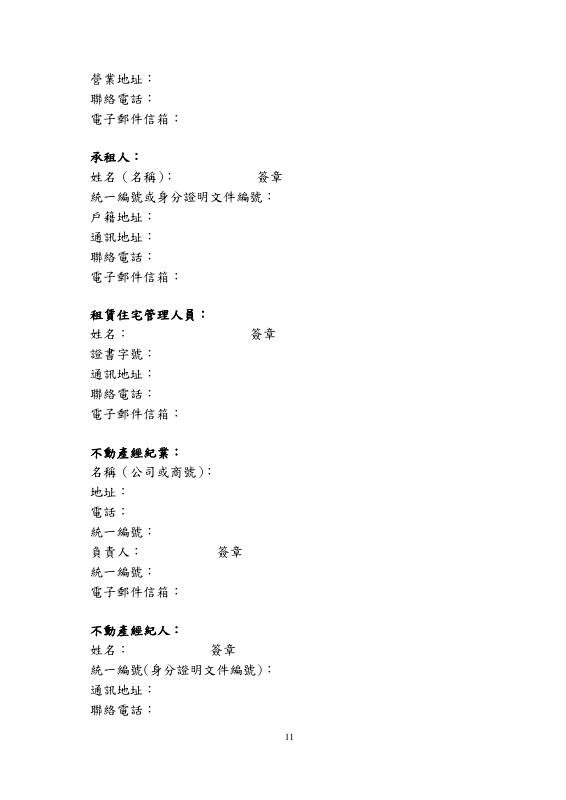

In [8]:
display(images[10])

In [ ]:
!wget -O SimSun.ttf https://github.com/StellarCN/scp_zh/raw/master/fonts/SimSun.ttf
!mkdir -p ~/.fonts/
!cp SimSun.ttf ~/.fonts/
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

zsh:1: command not found: wget
cp: SimSun.ttf: No such file or directory
Font directories:
	/System/Library/Assets/com_apple_MobileAsset_Font3
	/System/Library/Assets/com_apple_MobileAsset_Font4
	/System/Library/Fonts
	/Library/Fonts
	/Users/kdanmobile/Library/Fonts
	/System/Library/AssetsV2/com_apple_MobileAsset_Font7
	/Users/kdanmobile/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/Users/kdanmobile/.fonts
	/System/Library/Fonts/Supplemental
	/System/Library/AssetsV2/com_apple_MobileAsset_Font7/0818d874bf1d0e24a1fe62e79f407717792c5ee1.asset
	/System/Library/AssetsV2/com_apple_MobileAsset_Font7/0ab217c39c45c7c6acaddfa199fd32c55a7b4a19.asset
	/System/Library/AssetsV2/com_apple_MobileAsset_Font7/0c723883d13f8442faf3adb131fc1eb91c7a1bf1.asset
	/System/Library/AssetsV2/com_apple_MobileAsset_Font7/10b097deccb3c6126d986e24b1980031ff7399da.asset
	/System/Library/AssetsV2/com_apple_MobileAsset_Font7/12cc699be28fb04f3e3c4969a0378a87b920b174.asset
	/System/Library/AssetsV2/com_ap

## PaddleOCR

In [ ]:
# get necessary packages
!python3 -m pip install paddlepaddle -i https://pypi.tuna.tsinghua.edu.cn/simple
!pip install "paddleocr>=2.0.1" # Recommend to use version 2.0.1+

In [ ]:
from PIL import Image, ImageDraw
import pandas as pd
from paddleocr import PPStructure,draw_structure_result,save_structure_res,PaddleOCR
import os
import traceback
import numpy as np

In [ ]:
table_engine = PPStructure(table=True, ocr=True, show_log=True)

In [ ]:
img_path = images[0]

In [ ]:
img_np = np.array(img_path)

In [ ]:
result = table_engine(img_np)

In [ ]:
for line in result:
    line.pop('img')
    print(line)

In [ ]:
font_path = '/content/SimSun.ttf'
im_show = draw_structure_result(images[0], result,font_path=font_path)
im_show = Image.fromarray(im_show)
im_show.save('result.jpg')

In [ ]:
im_show

In [ ]:
df = pd.DataFrame(result)
df

In [ ]:
from paddleocr import PPStructure,save_structure_res
table_engine = PPStructure(show_log=True)

In [ ]:
import cv2
# img = cv2.imread('/content/T02高雄市大同社會住宅 房屋租賃契約書_page-0002.jpg')
result = table_engine(img_np)

In [ ]:
result

In [ ]:
for line in result:
    line.pop('img')
    print(line)

#LayoutLMv3

In [ ]:
!pip install --pre torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/nightly/cpu

In [ ]:
import torch
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from transformers import LayoutLMv3Processor, LayoutLMv3ForSequenceClassification
from transformers import LayoutLMv3FeatureExtractor
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 設置中文字體
import matplotlib.font_manager as fm
plt.rcParams['font.sans-serif'] = ['SimSun']
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
processor = LayoutLMv3Processor.from_pretrained("microsoft/layoutlmv3-base", apply_ocr=True)
model = LayoutLMv3ForSequenceClassification.from_pretrained("microsoft/layoutlmv3-base")
model.to(mps_device)

In [ ]:
# 讀取合約圖片
image_path = "/Users/kdanmobile/Desktop/Capture-2025-02-12-202401.png"  # 替換成你的合約圖片路徑
image = Image.open(image_path).convert("RGB")

In [ ]:
# 顯示原始圖片
plt.figure(figsize=(15, 10))
plt.imshow(image)
plt.title('Testing')
plt.axis('off')
plt.show()

In [ ]:
import pytesseract

In [ ]:
encoding = processor(image, return_tensors="pt")
for key in encoding.keys():
    encoding[key] = encoding[key].to(mps_device)

In [ ]:
# 獲取特徵
with torch.no_grad():
    outputs = model(**encoding, output_hidden_states=True)
    # 獲取最後一層的hidden states
    last_hidden_states = outputs.hidden_states[-1]
    # 轉回CPU進行後續處理
    last_hidden_states = last_hidden_states.cpu().numpy()

In [ ]:
# 獲取文字位置信息
words = processor.tokenizer.convert_ids_to_tokens(encoding["input_ids"][0])
boxes = encoding["bbox"][0].cpu().numpy()

In [ ]:
cleaned_words = [word.replace('Ġ', '') for word in words 
                        if word not in ['<s>', '</s>', '<pad>']]

In [ ]:
word_boxes = [(word, box) for word, box in zip(cleaned_words, boxes) 
                     if word not in ['<s>', '</s>', '<pad>']]

In [ ]:
word_boxes

In [ ]:
plt.rcParams['font.family'] = ['DejaVu Sans', 'sans-serif']

In [ ]:
field_colors = {
    'name': (255, 0, 0),     # 紅色 - 姓名相關
    'contact': (0, 255, 0),  # 綠色 - 聯絡方式
    'address': (0, 0, 255),  # 藍色 - 地址
    'signature': (255, 165, 0)  # 橙色 - 簽名處
}
# 分類關鍵詞
field_keywords = {
    'name': ['姓名', '稱謂', '租賃人', '管理人員'],
    'contact': ['電話', '手機', '聯絡'],
    'address': ['地址', '通訊地址'],
    'signature': ['簽章', '簽名']
}

# 英文顯示對應
field_display = {
    'name': 'NAME',
    'contact': 'CONTACT',
    'address': 'ADDRESS',
    'signature': 'SIGNATURE'
}


In [ ]:
# 1. 簡化顯示邏輯，先確認是否能檢測到基本的文字框
image_np = np.array(image)
for word, box in zip(words, boxes):
    if word not in ["[PAD]", "[CLS]", "[SEP]"]:
        x1, y1, x2, y2 = box
        # 轉換相對座標為絕對座標
        height, width = image_np.shape[:2]
        x1 = int(x1 * width / 1000)
        x2 = int(x2 * width / 1000)
        y1 = int(y1 * height / 1000)
        y2 = int(y2 * height / 1000)

        # 繪製所有檢測到的框，使用固定顏色
        cv2.rectangle(image_np, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # 打印檢測到的文字，幫助除錯
        print(f"Detected word: {word}, Box: {(x1, y1, x2, y2)}")


In [ ]:
# 顯示處理結果
plt.figure(figsize=(15, 10))
plt.imshow(image_np)
plt.title('LayoutLMv3')
plt.axis('off')
plt.show()

In [ ]:
# 識別可能的欄位
keywords = {
    'signature': ['簽名', '簽章', '署名', '印章'],
    'date': ['日期', '時間', '年月日'],
    'name': ['姓名', '名字', '稱謂'],
    'id': ['身份證', '證號', '統一編號']
}

field_detections = {}
for field_type, field_keywords in keywords.items():
    field_detections[field_type] = []
    for word, box in zip(words, boxes):
        if any(keyword in word for keyword in field_keywords):
            field_detections[field_type].append((word, box))

# 在新的圖片上標註欄位
image_fields = np.array(image)
colors = {
    'signature': (255, 0, 0),    # 紅色
    'date': (0, 255, 0),         # 綠色
    'name': (0, 0, 255),         # 藍色
    'id': (255, 255, 0)          # 黃色
}

In [ ]:
for field_type, detections in field_detections.items():
    for word, box in detections:
        x1, y1, x2, y2 = box
        # 轉換相對座標為絕對座標
        height, width = image_fields.shape[:2]
        x1 = int(x1 * width / 1000)
        x2 = int(x2 * width / 1000)
        y1 = int(y1 * height / 1000)
        y2 = int(y2 * height / 1000)

        # 繪製邊界框
        cv2.rectangle(image_fields, (x1, y1), (x2, y2), colors[field_type], 2)
        # 添加欄位類型標籤
        cv2.putText(image_fields, field_type, (x1, y1-5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, colors[field_type], 2)

In [ ]:
# 顯示欄位檢測結果
plt.figure(figsize=(15, 10))
plt.imshow(image_fields)
plt.title('欄位檢測結果')
plt.axis('off')
plt.show()


In [ ]:
# 輸出檢測統計
print("\n檢測到的欄位統計：")
for field_type, detections in field_detections.items():
    print(f"{field_type}: {len(detections)} 個")

# 輸出詳細位置信息
print("\n欄位詳細信息：")
for field_type, detections in field_detections.items():
    if detections:
        print(f"\n{field_type}欄位：")
        for word, box in detections:
            print(f"文字：{word}, 位置：{box}")